# Lösungen

In [1]:
import random
from matplotlib import pyplot as plt
import math
import numpy as np



def run_model(population, ticks, model_type=1):

    """Modell mit Beeinflussung durch direkte Nachbarn. Reproduziert Modell 1 in Mäs 2015. """

    # für jeden Zeitschritt
    for t in range(ticks):

        # zufälligen Agenten ziehen
        focal_agent = random.choice(population)

        # Meinungsgewichte ermitteln und jedem Agenten als Attribut einspeichern
        if model_type == 1:
            get_opinion_weights_1(focal_agent, population)
        elif model_type == 2:
            get_opinion_weights_2(focal_agent, population)
        elif model_type == 3:
            get_opinion_weights_3(focal_agent, population)
        else:
            raise ValueError ("Der Parameter 'model_type' hat keinen gültigen Wert.")
        
        # Meinungsveränderung berechnen
        calculate_opinion_change(focal_agent, population)
        
        # Für jeden Agenten
        for agent in population:
            # Aktuelle Meinung archivieren
            agent["opinion_history"].append(agent["opinion"])
    
    
    # Nach der Simulation: Output-Daten plotten
    fig, ax = plt.subplots()
    
    for agent in population:
        ax.plot(agent["opinion_history"])
    
    ax.set(xlabel="tick", ylabel="opinion", title="Model " + str(model_type))
    plt.show()


    
def calculate_opinion_change(focal_agent, population):
    
    """Berechnet die Meinungsveränderung des fokalen Agenten i nach der Beeinflussung durch die Population."""
    
    ############################################################
    # Oberhalb des Bruchstriches
    ############################################################
      
    # Liste für die gewichteten Meinungsunterschiede, die später aufsummiert werden
    sum_of_weighted_opinion_diffs = 0
    
    # Für jede Position in Population
    for agent in population:
        
        # Meinungsdifferenz berechnen
        opinion_diff = agent["opinion"] - focal_agent["opinion"]
        
        # Meinungsdifferenz mit entsprechendem Gewicht aus Gewichts-Liste gewichten
        weighted_opinion_diff = opinion_diff * agent["temporary_opinion_weight"]
        
        # gewichtete Meinungsdifferenz an entsprechende Liste anhängen
        sum_of_weighted_opinion_diffs += weighted_opinion_diff
    
    
    ############################################################
    # Unterhalb des Bruchstriches
    ############################################################
    
    # Achtung: Fehler in Formel in Original-Text
    # Es muss korrekterweise die Summe der Beträge der Gewichte berechnet werden
    
    # Summierungsvariable für absolute Beträge der Gewichte
    sum_of_abs_opinion_weights = 0
    
    # für jedes Gewicht in weights
    for agent in population:
        # absoluten Betrag des Gewichts ermitteln
        abs_opinion_weight = abs(agent["temporary_opinion_weight"])
        
        # auf Summe aufsummieren
        sum_of_abs_opinion_weights += abs_opinion_weight
    
    ############################################################
    # Dividieren / Durchschnitt berechnen
    ############################################################
    
    # Meinungsveränderung berechnen
    opinion_change = sum_of_weighted_opinion_diffs / sum_of_abs_opinion_weights
    
    
    ############################################################
    # Meinung beim fokalen Agenten verändern
    ############################################################
    
    # neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
    new_opinion = focal_agent["opinion"] + opinion_change

    # Meinung in zulässigem Bereich halten
    if new_opinion < 0:
        new_opinion = 0
    elif new_opinion > 1:
        new_opinion = 1

    # Alte Meinung des Agenten durch neue Meinung ersetzen
    focal_agent["opinion"] = new_opinion
    

    
def get_opinion_weights_1(focal_agent, population):
    
    """
    Ermittelt die Gewichte der Beeinflussung des fokalen Agenten durch einen anderen Agenten 
    nach den Regeln von Modell 1.
    """
    
    for agent in population:
        # Distanz zwischen Position des fokalen Agenten i und des Agenten j berechnen
        distance = abs(agent["position"] - focal_agent["position"])

        # Wenn Distanz kleinergleich 1
        if distance <= 1:
            agent["temporary_opinion_weight"] = 1

        # Ansonsten:
        else:
            agent["temporary_opinion_weight"] = 0

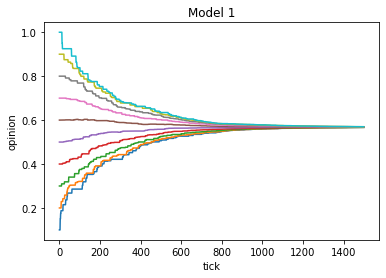

In [2]:
# Population erstellen
population = []
for i in range(10):
    agent = {
        "position": i,
        "opinion": (i+1)/10,
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

# Modell ausführen
run_model(
    population=population, 
    ticks=1500, 
    model_type=1,
)

## Aufgabe 2

In [3]:
def get_opinion_weights_2(focal_agent, population):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 2."""
    
    # für jeden Agenten bzw. jede Position in Population
    for agent in population:
        
        # Absoluten Meinungsunterschied (nicht Positionsunterschied wie in Modell 1) berechnen
        abs_opinion_diff = abs(agent["opinion"] - focal_agent["opinion"])
        
        # Wenn Meinungsunterschied kleinergleich Grenzwert
        if abs_opinion_diff <= 0.2:
            # Gewicht von 1 einspeichern
            agent["temporary_opinion_weight"] = 1
        
        # Ansonsten: 
        else:
            # Gewicht von 0 einspeichern
            agent["temporary_opinion_weight"] = 0

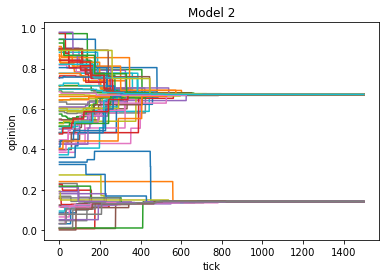

In [4]:
# Population erstellen
population = []
for i in range(100):
    agent = {
        "position": i,
        "opinion": random.random(),
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

# Modell ausführen
run_model(
    population=population, 
    ticks=1500, 
    model_type=2,
)

## Aufgabe 3

In [5]:
def get_opinion_weights_3(focal_agent, population):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 3."""
    
    # für jeden Agenten bzw. jede Position in Population
    for agent in population:
        
        # absoluten Meinungsunterschied berechnen
        abs_opinion_diff = abs(agent["opinion"] - focal_agent["opinion"])
        
        
        """Anmerkung zu Gewichten:
        Die Gewichte werden nun auf einen kontinuierlichen Bereich zwischen -1 bis 1 skaliert.
        Meinungsunterschiede von >0.5 bis 1 führen zu Gewichten von <0 bis -1.
        Meinungsunterschiede von 0 bis 0.5 führen zu Gewichten von 1 bis 0,
        """
        
        # Wenn Meinungsunterschied größer Grenzwert
        if abs_opinion_diff > 0.5:
            # negatives Gewicht einspeichern
            agent["temporary_opinion_weight"] = -1 * (2 * abs_opinion_diff - 1)
       
        # ansonsten:
        else:
            # positives Gewicht einspeichern
            agent["temporary_opinion_weight"] = (1 - 2 * abs_opinion_diff)

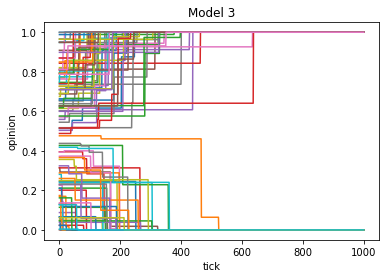

In [6]:
# Population erstellen
population = []
for i in range(100):
    agent = {
        "position": i,
        "opinion": random.random(),
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

# Modell ausführen
run_model(
    population=population, 
    ticks=1000, 
    model_type=3,
)